In [1]:
import pandas as pd
import numpy as np
from IPython.display import display


df1 = pd.read_csv('data.csv', parse_dates=['timestamp'])
df2 = pd.read_csv('k_data.csv', parse_dates=['timestamp'])
df3 = pd.read_csv('range_data.csv', parse_dates=['timestamp'])

df = pd.concat([df1, df2, df3])

df = df[df['timestamp'] > '2021-07-21']
print(df)

                 func  control       ta       agg  meter_num  meter_time name  \
0      meterRegTime_3    10700  1457800         0         60   838101900  cir   
1      meterRepTime_3  9750200        0  14110800         60   378310300  cir   
2      meterRegTime_3     9900   385600         0         50   692593200  cir   
3      meterRegTime_3     9800   357800         0         50   690603000  cir   
4      meterRepTime_3  9338800        0   3785700         50   306429800  cir   
...               ...      ...      ...       ...        ...         ...  ...   
9895  meterRepTime_r6  9629500        0   1542100         20   130536300  cir   
9896  meterRepTime_r5  9675000        0   1556300         20   140898900  cir   
9897  meterRepTime_r4  9648500        0   1708000         20   131661100  cir   
9898  meterRepTime_r3  9613600        0   1464900         20   129671900  cir   
9899  meterRepTime_r2  9614900        0   1468200         20   130983300  cir   

           host           t

In [2]:

df['ex_meter_time'] = df.control + df.ta + df['agg']

# display(df.style)
df.head()
# print( + df.control)

,func,control,ta,agg,meter_num,meter_time,name,host,timestamp,ex_meter_time
0,meterRegTime_3,10700,1457800,0,60,838101900,cir,BruceChen,2021-07-23 08:31:11,1468500
1,meterRepTime_3,9750200,0,14110800,60,378310300,cir,BruceChen,2021-07-23 08:31:11,23861000
2,meterRegTime_3,9900,385600,0,50,692593200,cir,BruceChen,2021-07-23 08:31:11,395500
3,meterRegTime_3,9800,357800,0,50,690603000,cir,BruceChen,2021-07-23 08:31:11,367600
4,meterRepTime_3,9338800,0,3785700,50,306429800,cir,BruceChen,2021-07-23 08:31:11,13124500


In [3]:
avg_col = {'control':np.mean, 'ta':np.mean, 'agg':np.mean, 'meter_time':np.mean, 'ex_meter_time':np.mean}
avg_df_midx = df.groupby(['host', 'name', 'func', 'meter_num']).agg(avg_col)
display(avg_df_midx.style)
avg_df_midx.rename(index={'cir':'our'})

control   ta  \
host        name   func                meter_num                      
BruceChen   boudia oneTimeMeterRegTime 20         1.230801e+03  0.0   
                                       30         1.178085e+03  0.0   
                                       40         9.573983e+02  0.0   
                                       50         9.701552e+02  0.0   
                                       60         2.064030e+05  0.0   
...                                                        ...  ...   
raspberrypi ni     oneTimeMeterRepTime 20         6.577190e+07  0.0   
                                       30         6.555265e+07  0.0   
                                       40         6.527130e+07  0.0   
                                       50         6.510649e+07  0.0   
                                       60         6.568253e+07  0.0   

                                                           agg    meter_time  \
host        name   func                meter_num                               
BruceChen   boudia oneTimeMeterRegTime 20         1.299724e+08  1.298585e+08   
                                       30         1.952414e+08  1.951927e+08   
                                       40         2.600127e+08  2.599872e+08   
                                       50         3.266432e+08  3.264734e+08   
                                       60         3.929661e+08  3.925987e+08   
...                                                        ...           ...   
raspberrypi ni     oneTimeMeterRepTime 20         3.933533e+09  2.210176e+09   
                                       30         5.885179e+09  3.318676e+09   
                                       40         7.832120e+09  4.428761e+09   
                                       50         9.786938e+09  5.553004e+09   
                                       60         1.177876e+10  6.709774e+09   

                                                  ex_meter_time  
host        name   func                meter_num                 
BruceChen   boudia oneTimeMeterRegTime 20          1.299737e+08  
                                       30          1.952426e+08  
                                       40          2.600137e+08  
                                       50          3.266442e+08  
                                       60          3.931725e+08  
...                                                         ...  
raspberrypi ni     oneTimeMeterRepTime 20          3.999305e+09  
                                       30          5.950731e+09  
                                       40          7.897391e+09  
                                       50          9.852044e+09  
                                       60          1.184445e+10  

[171 rows x 5 columns]

In [4]:
display(avg_df_midx.index)

MultiIndex([(  'BruceChen', 'boudia', 'oneTimeMeterRegTime', 20),
            (  'BruceChen', 'boudia', 'oneTimeMeterRegTime', 30),
            (  'BruceChen', 'boudia', 'oneTimeMeterRegTime', 40),
            (  'BruceChen', 'boudia', 'oneTimeMeterRegTime', 50),
            (  'BruceChen', 'boudia', 'oneTimeMeterRegTime', 60),
            (  'BruceChen', 'boudia', 'oneTimeMeterRepTime', 20),
            (  'BruceChen', 'boudia', 'oneTimeMeterRepTime', 30),
            (  'BruceChen', 'boudia', 'oneTimeMeterRepTime', 40),
            (  'BruceChen', 'boudia', 'oneTimeMeterRepTime', 50),
            (  'BruceChen', 'boudia', 'oneTimeMeterRepTime', 60),
            ...
            ('raspberrypi',     'ni', 'oneTimeMeterRegTime', 20),
            ('raspberrypi',     'ni', 'oneTimeMeterRegTime', 30),
            ('raspberrypi',     'ni', 'oneTimeMeterRegTime', 40),
            ('raspberrypi',     'ni', 'oneTimeMeterRegTime', 50),
            ('raspberrypi',     'ni', 'oneTimeMeterRegTime',

In [5]:
display(avg_df_midx.loc[('raspberrypi', 'boudia', 'oneTimeMeterRegTime')].index)
display(avg_df_midx.loc[('raspberrypi', 'boudia', 'oneTimeMeterRegTime'), 'meter_time'])

Int64Index([20, 30, 40, 50, 60], dtype='int64', name='meter_num')

meter_num
20    3.601060e+08
30    5.398480e+08
40    7.209261e+08
50    9.014799e+08
60    1.112551e+09
Name: meter_time, dtype: float64

# 对比实验


In [6]:
exp_name = avg_df_midx.index.get_level_values(1).drop_duplicates().array
display(exp_name)
# adjust order
exp_name[1], exp_name[3] = exp_name[3], exp_name[1]
display(exp_name)
name_map = {'boudia':'Boudia', 'cir':'Our', 'homo':'Chen', 'ni':'Ni'}
reg_func = [ 'oneTimeMeterRegTime' , 'oneTimeMeterRegTime', 'meterRegTime', 'meterRegTime_3']
rep_func = ['oneTimeMeterRepTime', 'oneTimeMeterRepTime', 'oneTimeMeterRepTime', 'meterRepTime_3']


<PandasArray>
['boudia', 'cir', 'homo', 'ni']
Length: 4, dtype: object

<PandasArray>
['boudia', 'ni', 'homo', 'cir']
Length: 4, dtype: object

In [7]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 10
# plt.rcParams['font.weight'] = 'bold'
# plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['lines.markersize'] = 2.5
plt.rcParams["figure.figsize"] = (5, 4)
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["axes.formatter.use_mathtext"] = True
markers = ['o', 'v', 's', 'd', 'X']
color = ['b', 'y', 'g', 'r']

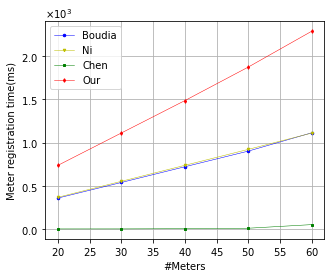

In [8]:
# 注册阶段 电表时间

for i, e, f in zip(range(0,4), exp_name, reg_func):
    x = avg_df_midx.loc[('raspberrypi', e, f)].index
    y = avg_df_midx.loc[('raspberrypi', e, f), 'meter_time']/1e6
    plt.plot(x, y, marker=markers[i], color=color[i], label=name_map[e])

plt.xlabel('#Meters')
plt.ylabel('Meter registration time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.legend()
plt.savefig('figs/meter_reg.svg')
plt.show()

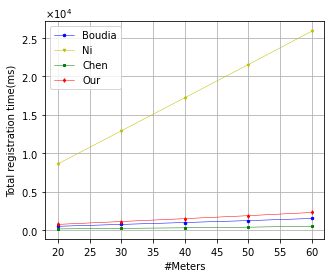

In [9]:
# 注册阶段 总时间
for i, e, f in zip(range(0,4), exp_name, reg_func):
    rap_df = avg_df_midx.loc[('raspberrypi', e, f)]
    host_df = avg_df_midx.loc[('BruceChen', e, f)]
    x = rap_df.index
    y = (host_df.ex_meter_time + rap_df.meter_time)/1e6
    plt.plot(x, y, marker=markers[i], color=color[i], label=name_map[e])

plt.xlabel('#Meters')
plt.ylabel('Total registration time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.legend()
plt.savefig('figs/total_reg.svg')

plt.show()

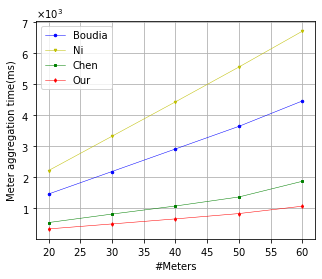

In [10]:
# 聚合阶段 电表
for i, e, f in zip(range(0,4), exp_name, rep_func):
    host_df = avg_df_midx.loc[('raspberrypi', e, f)]
    x = host_df.index
    y = host_df.meter_time/1e6
    plt.plot(x, y, marker=markers[i], color=color[i], label=name_map[e])

plt.xlabel('#Meters')
plt.ylabel('Meter aggregation time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.legend()
plt.savefig('figs/meter_report.svg')

plt.show()
plt.show()

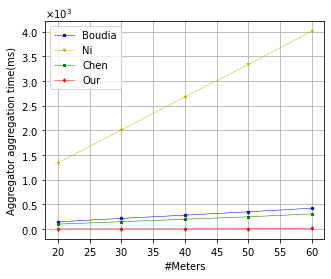

In [11]:
# 聚合阶段 聚合器

for i, e, f in zip(range(0,4), exp_name, rep_func):
    host_df = avg_df_midx.loc[('BruceChen', e, f)]
    x = host_df.index
    y = host_df['agg']/1e6
    plt.plot(x, y, marker=markers[i], color=color[i], label=name_map[e])

plt.xlabel('#Meters')
plt.ylabel('Aggregator aggregation time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.legend()
plt.savefig('figs/agg_report.svg')

plt.show()
plt.show()

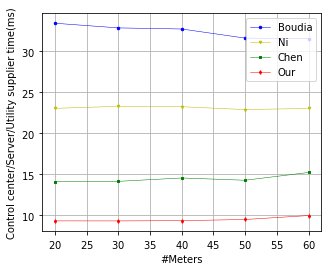

In [12]:
# 聚合阶段 控制中心

for i, e, f in zip(range(0,4), exp_name, rep_func):
    host_df = avg_df_midx.loc[('BruceChen', e, f)]
    x = host_df.index
    y = host_df.control/1e6
    plt.plot(x, y, marker=markers[i], color=color[i], label=name_map[e])

plt.xlabel('#Meters')
plt.ylabel('Control center/Server/Utility supplier time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.legend()
plt.savefig('figs/control_report.svg')

plt.show()
plt.show()

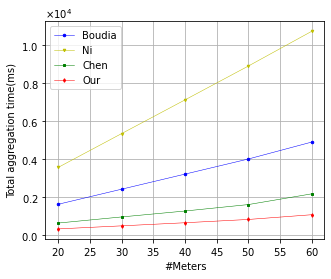

In [13]:
# 聚合阶段 总时间

for i, e, f in zip(range(0,4), exp_name, rep_func):
    rap_df = avg_df_midx.loc[('raspberrypi', e, f)]
    host_df = avg_df_midx.loc[('BruceChen', e, f)]
    x = rap_df.index
    y = (host_df.ex_meter_time + rap_df.meter_time)/1e6
    plt.plot(x, y, marker=markers[i], color=color[i], label=name_map[e])

plt.xlabel('#Meters')
plt.ylabel('Total aggregation time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.legend()
plt.savefig('figs/total_report.svg')
plt.show()


# 本文方法分析

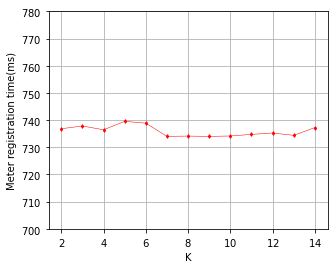

In [14]:
# k anonymous register meter

k = [k for k in range(2,15)]
k_anony_f = ['meterRegTime_' + str(k) for k in range(2, 15)]
m_num = 20
k_y = [avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'meter_time']/1e6 for f in k_anony_f]

plt.plot(k, k_y, marker=markers[3], color='r')

plt.xlabel('K')
plt.ylabel('Meter registration time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.yticks(range(700, 790, 10))
# plt.xticks(range(1,8))
plt.savefig('figs/meter_k_meter_register.svg')
plt.show()

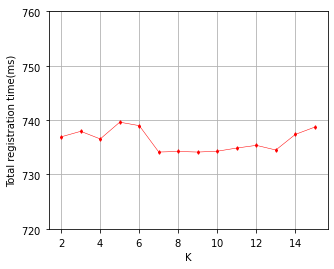

In [15]:
# 注册阶段 总时间
# k anonymous register total

k = [k for k in range(2, 16)]
k_anony_f = ['meterRegTime_' + str(k) for k in range(2, 16)]
m_num = 20
k_y = []
for fname in k_anony_f:
     rasp_time = avg_df_midx.loc[('raspberrypi', 'cir', fname, m_num), 'meter_time']
     host_time = avg_df_midx.loc[('BruceChen', 'cir', fname, m_num), 'ex_meter_time']
     y_time = (rasp_time + host_time) / 1e6
     k_y.append(y_time)

plt.plot(k, k_y, marker=markers[3], color='r')
plt.xlabel('K')
plt.ylabel('Total registration time(ms)')
plt.yticks(range(720, 770, 10))
# plt.xticks(range(1, 8))
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.savefig('figs/total_k_total_reg.svg')

plt.show()

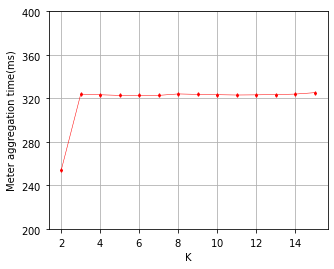

In [16]:
#聚合阶段
# k anonymous report merter

k = [k for k in range(2,16)]
k_anony_f = ['meterRepTime_' + str(k) for k in range(2, 16)]
m_num = 20
k_y = [avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'meter_time']/1e6 for f in k_anony_f]

plt.plot(k, k_y, marker=markers[3], color='r')

plt.xlabel('K')
plt.ylabel('Meter aggregation time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.yticks(range(200, 430, 40))
# plt.xticks(range(1, 8))
plt.savefig('figs/meter_k_meter_report.svg')
plt.show()

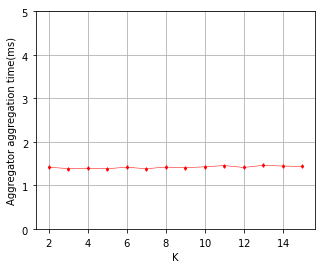

In [17]:
# k anonymous report aggregator
k = [k for k in range(2,16)]
k_anony_f = ['meterRepTime_' + str(k) for k in range(2, 16)]
m_num = 20
k_y = [avg_df_midx.loc[('BruceChen', 'cir', f, m_num), 'agg']/1e6 for f in k_anony_f]

plt.plot(k, k_y, marker=markers[3], color='r')

plt.xlabel('K')
plt.ylabel('Aggregator aggregation time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.yticks(range(0, 6))
# plt.xticks(range(1, 8))
plt.savefig('figs/meter_k_agg_report.svg')
plt.show()

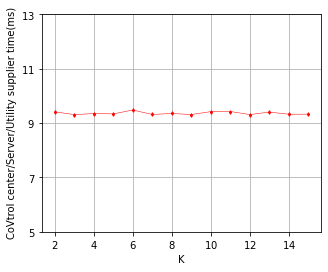

In [18]:
# k anonymous report controll

k = [k for k in range(2,16)]
k_anony_f = ['meterRepTime_' + str(k) for k in range(2, 16)]
m_num = 20
k_y = [avg_df_midx.loc[('BruceChen', 'cir', f, m_num), 'control']/1e6 for f in k_anony_f]

plt.plot(k, k_y, marker=markers[3], color='r')

plt.xlabel('K')
plt.ylabel('CoVtrol center/Server/Utility supplier time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.yticks(range(5, 15, 2))
# plt.xticks(range(1, 8))
plt.savefig('figs/meter_k_control_report.svg')
plt.show()

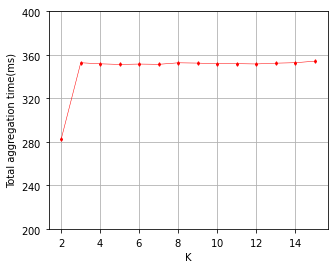

In [19]:

# k anonymous report total

k = [k for k in range(2,16)]
k_anony_f = ['meterRepTime_' + str(k) for k in range(2, 16)]
m_num = 20
k_y = []
for f in k_anony_f:
    rasp_time = avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'meter_time']
    host_time = avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'ex_meter_time']
    y_time = (rasp_time + host_time) / 1e6
    k_y.append(y_time)

plt.plot(k, k_y, marker=markers[3], color='r')

plt.xlabel('K')
plt.ylabel('Total aggregation time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.yticks(range(200, 430, 40))
# plt.xticks(range(1, 8))
plt.savefig('figs/meter_k_total_report.svg')
plt.show()

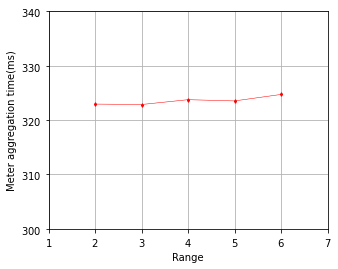

In [20]:
# k anonymous range meter
rMax = 7
r = [r for r in range(2,rMax)]
r_anony_f = ['meterRepTime_r' + str(k) for k in range(2,rMax)]
m_num = 20
r_y = [avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'meter_time']/1e6 for f in r_anony_f]

plt.plot(r, r_y, marker=markers[3], color='r')

plt.xlabel('Range')
plt.ylabel('Meter aggregation time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.yticks(range(300, 350, 10))
plt.xticks(range(1, 8))

plt.savefig('figs/meter_range_meter_report.svg')
plt.show()

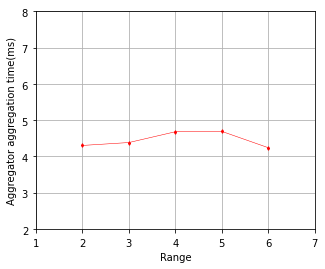

In [21]:
# k anonymous range aggregator

r = [r for r in range(2,rMax)]
r_anony_f = ['meterRepTime_r' + str(k) for k in range(2, rMax)]
m_num = 20
r_y = [avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'agg']/1e6 for f in r_anony_f]

plt.plot(r, r_y, marker=markers[3], color='r')

plt.xlabel('Range')
plt.ylabel('Aggregator aggregation time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.yticks(range(2, 9))
plt.xticks(range(1, 8))

plt.savefig('figs/meter_range_agg_report.svg')
plt.show()

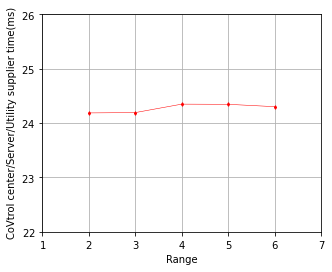

In [22]:
# k anonymous range control

r = [r for r in range(2,rMax)]
r_anony_f = ['meterRepTime_r' + str(k) for k in range(2,rMax)]
m_num = 20
r_y = [avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'control']/1e6 for f in r_anony_f]

plt.plot(r, r_y, marker=markers[3], color='r')

plt.xlabel('Range')
plt.ylabel('CoVtrol center/Server/Utility supplier time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.yticks(range(22, 27))
plt.xticks(range(1, 8))

plt.savefig('figs/meter_range_control_report.svg')
plt.show()

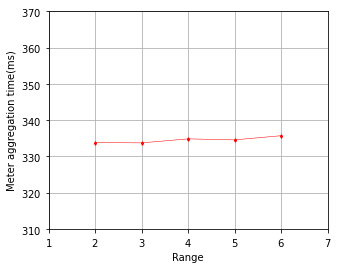

In [23]:
# k anonymous range total

r = [r for r in range(2,rMax)]
r_anony_f = ['meterRepTime_r' + str(k) for k in range(2,rMax)]
m_num = 20
r_y = []
for fname in r_anony_f:
    rasp_time = avg_df_midx.loc[('raspberrypi', 'cir', fname, m_num), 'meter_time']
    host_time = avg_df_midx.loc[('BruceChen', 'cir', fname, m_num), 'ex_meter_time']
    y_time = (rasp_time + host_time) / 1e6
    r_y.append(y_time)

plt.plot(r, r_y, marker=markers[3], color='r')

plt.xlabel('Range')
plt.ylabel('Meter aggregation time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.yticks(range(310, 380, 10))
plt.xticks(range(1, 8))

plt.savefig('figs/meter_range_total_report.svg')
plt.show()